In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
help(cv2.cvtColor)

Help on built-in function cvtColor:

cvtColor(...)
    cvtColor(src, code[, dst[, dstCn]]) -> dst



In [3]:
img = cv2.imread('img.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [4]:
img.shape

(960, 713, 3)

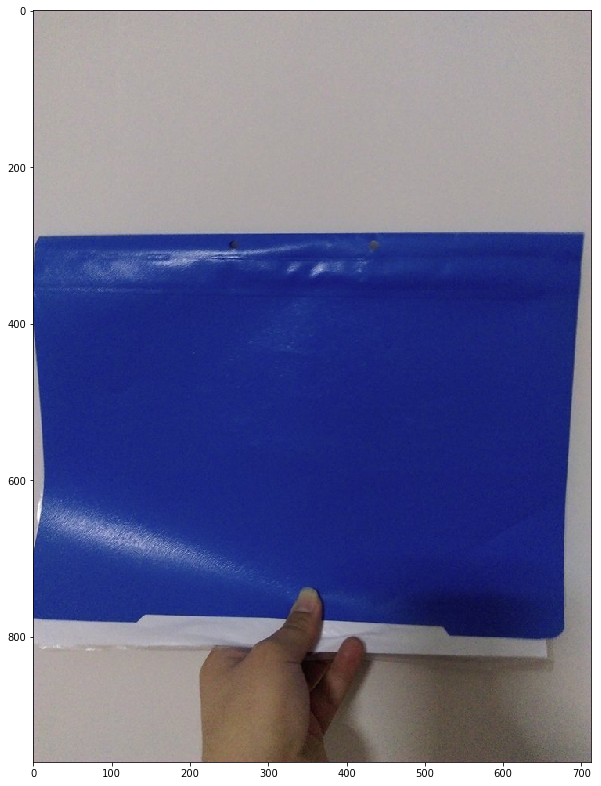

In [5]:
plt.figure(figsize=(10,22))
plt.imshow(img)
plt.show()

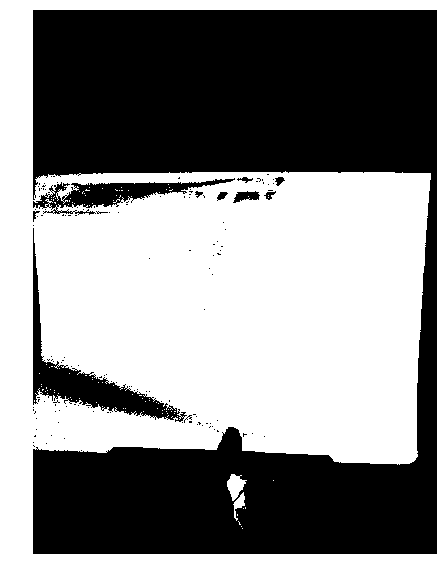

In [6]:
rgb_lower_filter = (0,0,0)
rgb_upper_filter = (40,75,200)
mask = cv2.inRange(img, rgb_lower_filter, rgb_upper_filter)
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

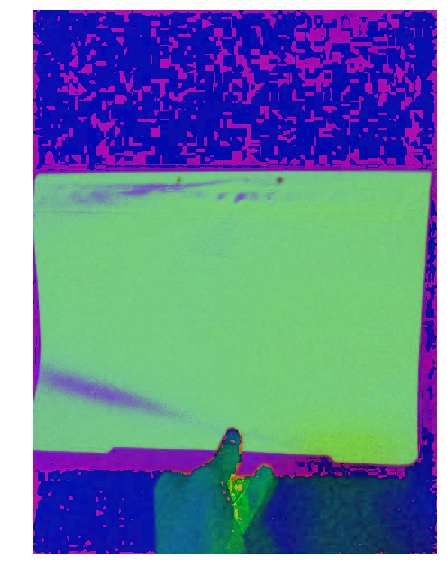

In [7]:
hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(hsv)
plt.show()

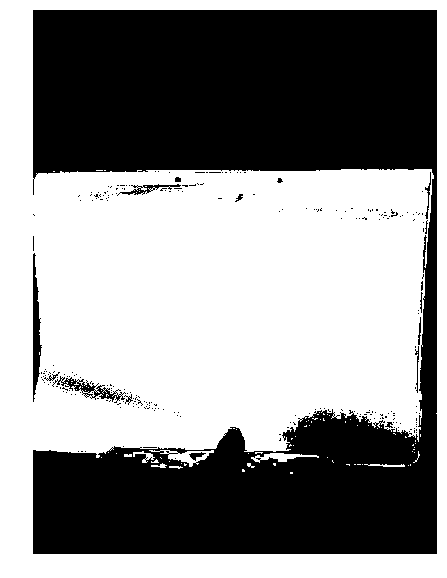

In [8]:
hsv_lower_filter = (50,14,110)
hsv_upper_filter = (120,229,178)
mask = cv2.inRange(hsv, hsv_lower_filter, hsv_upper_filter)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(mask,cmap='gray')
plt.show()

In [9]:
mask.shape

(960, 713)

In [18]:
_,contours,__= cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [19]:
len(contours)

134

In [20]:
center_list = []
radius_list = []
for cnt in contours:
    (x,y),radius= cv2.minEnclosingCircle(cnt)
    center_list.append((int(x),int(y)))
    radius_list.append(int(radius))
ix = np.argmax(radius_list)

In [21]:
print 'Nesne Konumu : ',center_list[ix]
print 'Nesne Büyüklüğü : ',radius_list[ix]

Nesne Konumu :  (352, 528)
Nesne Büyüklüğü :  429


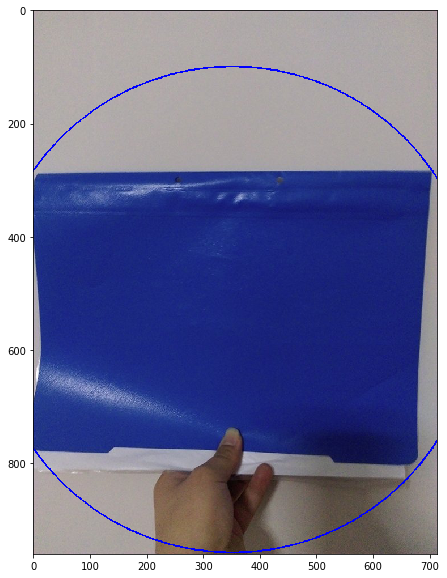

In [28]:
out_image = img.copy()
cv2.circle(out_image,center_list[ix],radius_list[ix],(0,0,255),2)
plt.figure(figsize=(10,10))
#plt.axis("off")
plt.imshow(out_image)
plt.show()

In [29]:
x,y,w,h = cv2.boundingRect(contours[ix])
out_image = img.copy()
cv2.rectangle(out_image,(x,y),(x+w,y+h),(0,255,255),2)
print 'Kapsayan Dikdörtgen sol üst : ',(x,y)
print 'Kapsayan Dikdörtgen En / Boy : ',(w,h)

Kapsayan Dikdörtgen sol üst :  (1, 281)
Kapsayan Dikdörtgen En / Boy :  (706, 519)


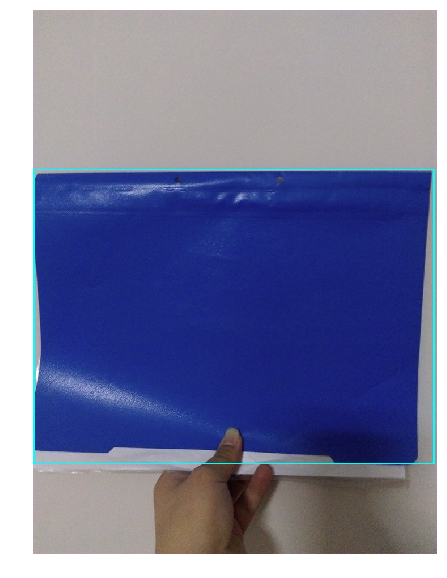

In [30]:
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(out_image)
plt.show()